# Heart Attack Prediction - XGBoost

## Load Dataset

In [ ]:
import pandas as pd
# Load the CSV file
file_path = 'heart_attack_prediction_indonesia.csv'
try:
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Print basic information about the dataset
    print(f"Dataset shape: {df.shape}")
    print("\nColumn names:")
    print(df.columns.tolist())

    # Print the first 5 rows of the dataset
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Print basic statistics
    print("\nBasic statistics:")
    print(df.describe())

    # Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset shape: (158355, 28)

Column names:
['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'EKG_results', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'heart_attack']

First 5 rows of the dataset:
   age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60    Male  Rural       Middle             0         1                211   
1   53  Female  Urban          Low             0         0                208   
2   62  Female  Urban          Low             0         0                231   
3   73    Male  Urban          Low             1         0                202

## Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Check class distribution for the target variable
print("Target variable (heart_attack) distribution:")
heart_attack_counts = df['heart_attack'].value_counts()
print(heart_attack_counts)
print(f"Class distribution percentages: {heart_attack_counts / len(df) * 100}")

# 2. Check distribution of categorical variables
categorical_columns = ['gender', 'region', 'income_level', 'hypertension', 'diabetes', 
                      'obesity', 'family_history', 'smoking_status', 'EKG_results',
                      'previous_heart_disease', 'medication_usage', 
                      'participated_in_free_screening']

print("\nCategorical variables distribution:")
for col in categorical_columns:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())
    print(f"Percentage: {df[col].value_counts() / len(df) * 100}")

# 3. Check for outliers in numerical features
numerical_columns = ['age', 'waist_circumference', 'cholesterol_level', 
                     'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
                     'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides']

# 4. Check for correlation between features
print("\nCorrelation between numerical features and target:")
correlation_with_target = df[numerical_columns + ['heart_attack']].corr()['heart_attack'].sort_values(ascending=False)
print(correlation_with_target)

# 5. Check alcohol_consumption which has missing values
print("\nAlcohol consumption analysis:")
print(f"Missing values: {df['alcohol_consumption'].isnull().sum()} ({df['alcohol_consumption'].isnull().sum()/len(df)*100:.2f}%)")
if not df['alcohol_consumption'].isnull().all():
    print("Distribution of non-null values:")
    print(df['alcohol_consumption'].value_counts())

# 6. Feature relationships with target
print("\nTarget rate by gender:")
print(df.groupby('gender')['heart_attack'].mean())

print("\nTarget rate by age groups:")
df['age_group'] = pd.cut(df['age'], bins=[25, 35, 45, 55, 65, 75, 90], labels=['25-35', '36-45', '46-55', '56-65', '66-75', '76-90'])
print(df.groupby('age_group')['heart_attack'].mean())

print("\nTarget rate by region:")
print(df.groupby('region')['heart_attack'].mean())

print("\nTarget rate by income level:")
print(df.groupby('income_level')['heart_attack'].mean())

# 7. Check data ranges and distributions for key health indicators
for col in ['cholesterol_level', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar']:
    print(f"\n{col} distribution statistics:")
    print(df[col].describe())

Target variable (heart_attack) distribution:
heart_attack
0    94854
1    63501
Name: count, dtype: int64
Class distribution percentages: heart_attack
0    59.899593
1    40.100407
Name: count, dtype: float64

Categorical variables distribution:

gender distribution:
gender
Male      82243
Female    76112
Name: count, dtype: int64
Percentage: gender
Male      51.93584
Female    48.06416
Name: count, dtype: float64

region distribution:
region
Urban    103038
Rural     55317
Name: count, dtype: int64
Percentage: region
Urban    65.067728
Rural    34.932272
Name: count, dtype: float64

income_level distribution:
income_level
Middle    71230
Low       63422
High      23703
Name: count, dtype: int64
Percentage: income_level
Middle    44.981213
Low       40.050519
High      14.968268
Name: count, dtype: float64

hypertension distribution:
hypertension
0    110996
1     47359
Name: count, dtype: int64
Percentage: hypertension
0    70.093145
1    29.906855
Name: count, dtype: float64

diabete

/tmp/ipykernel_31/3606296181.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['heart_attack'].mean())


Missing Values:
 age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease 

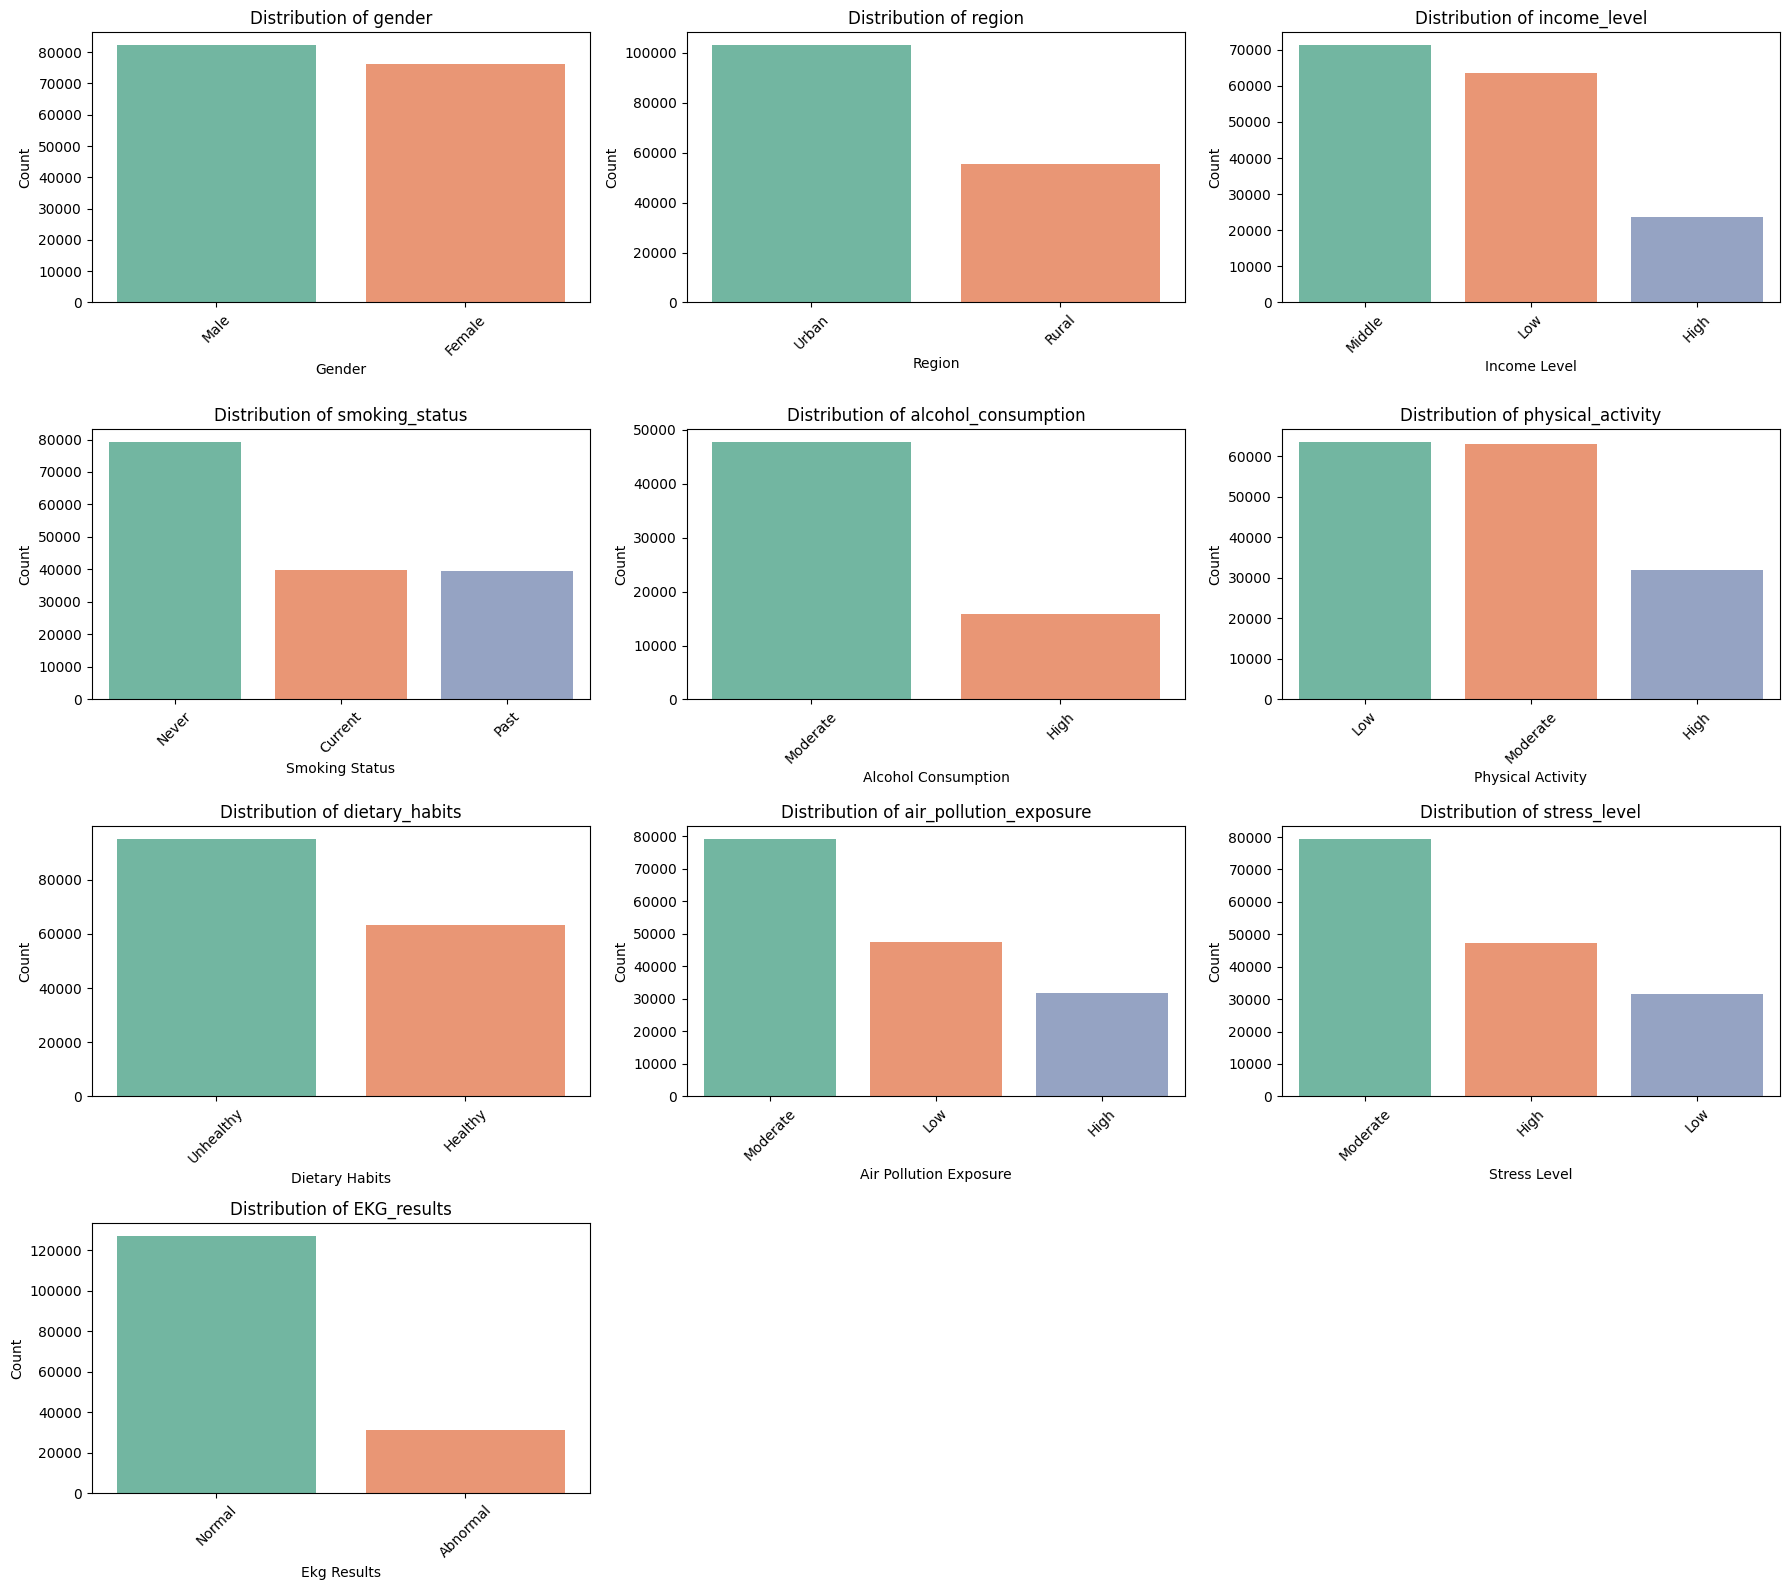

In [3]:
def explore_data(df):
    
    # Check missing values
    print("Missing Values:\n", df.isnull().sum())
    print("\nMissing Values Percentage:\n", df.isnull().sum() / len(df) * 100)
    print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

    # Summary statistics for numerical columns
    print("\nSummary Statistics for Numerical Columns:")
    print(df.describe())

    # Check class distribution
    print("\nClass Distribution of heart_attack:")
    print(df['heart_attack'].value_counts())

    # Visualize categorical column distributions
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    n_cols = 3
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    plt.figure(figsize=(n_cols * 6, n_rows * 4))
    for idx, col in enumerate(categorical_cols, 1):
        plt.subplot(n_rows, n_cols, idx)
        sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col.replace('_', ' ').title())
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run EDA
explore_data(df)

### Experiment 1 - Using class weights


Loading dataset...
Original dataset shape: (158355, 28)
Class distribution: heart_attack
0    94854
1    63501
Name: count, dtype: int64
Missing values:
alcohol_consumption    94848
dtype: int64

Handling missing values in alcohol_consumption...
Before: alcohol_consumption
NaN         94848
Moderate    47725
High        15782
Name: count, dtype: int64
After: alcohol_consumption
Non-alcoholic    94848
Moderate         47725
High             15782
Name: count, dtype: int64
Number of Numeric Columns: 10
Number of Nominal Columns: 17

Encoding categorical variables...

Cleaning data...
Dataset shape after cleaning: (158355, 28)

Handling outliers and selecting features...
Column cholesterol_level: 200 outliers detected (0.13%)
Column waist_circumference: 426 outliers detected (0.27%)
Column blood_pressure_systolic: 440 outliers detected (0.28%)
Column blood_pressure_diastolic: 421 outliers detected (0.27%)
Column fasting_blood_sugar: 437 outliers detected (0.28%)
Column cholesterol_hdl: 43

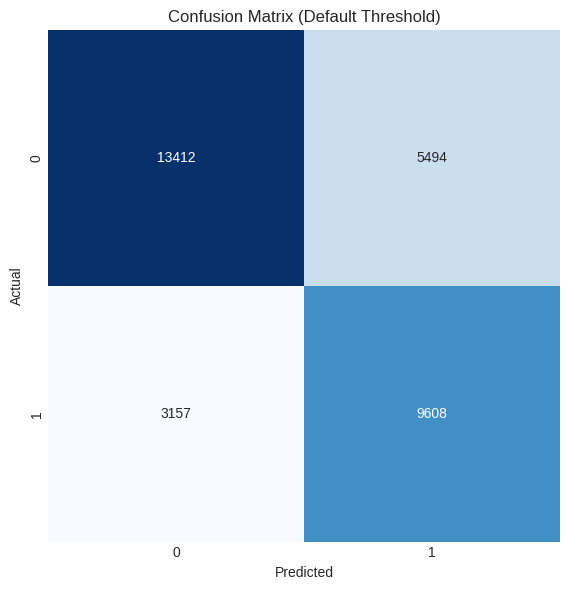


Feature Importances (All Columns):
                       Feature  Importance
        previous_heart_disease    0.437075
                  hypertension    0.285472
                      diabetes    0.087659
                       obesity    0.049886
                smoking_status    0.041190
                           age    0.020413
           fasting_blood_sugar    0.018598
             cholesterol_level    0.016761
                dietary_habits    0.002896
                   sleep_hours    0.002766
        air_pollution_exposure    0.002674
                family_history    0.002472
               cholesterol_hdl    0.002379
                   EKG_results    0.002333
               cholesterol_ldl    0.002308
              medication_usage    0.002289
           waist_circumference    0.002276
       blood_pressure_systolic    0.002233
                        gender    0.002213
                        region    0.002211
                  income_level    0.002158
                 t

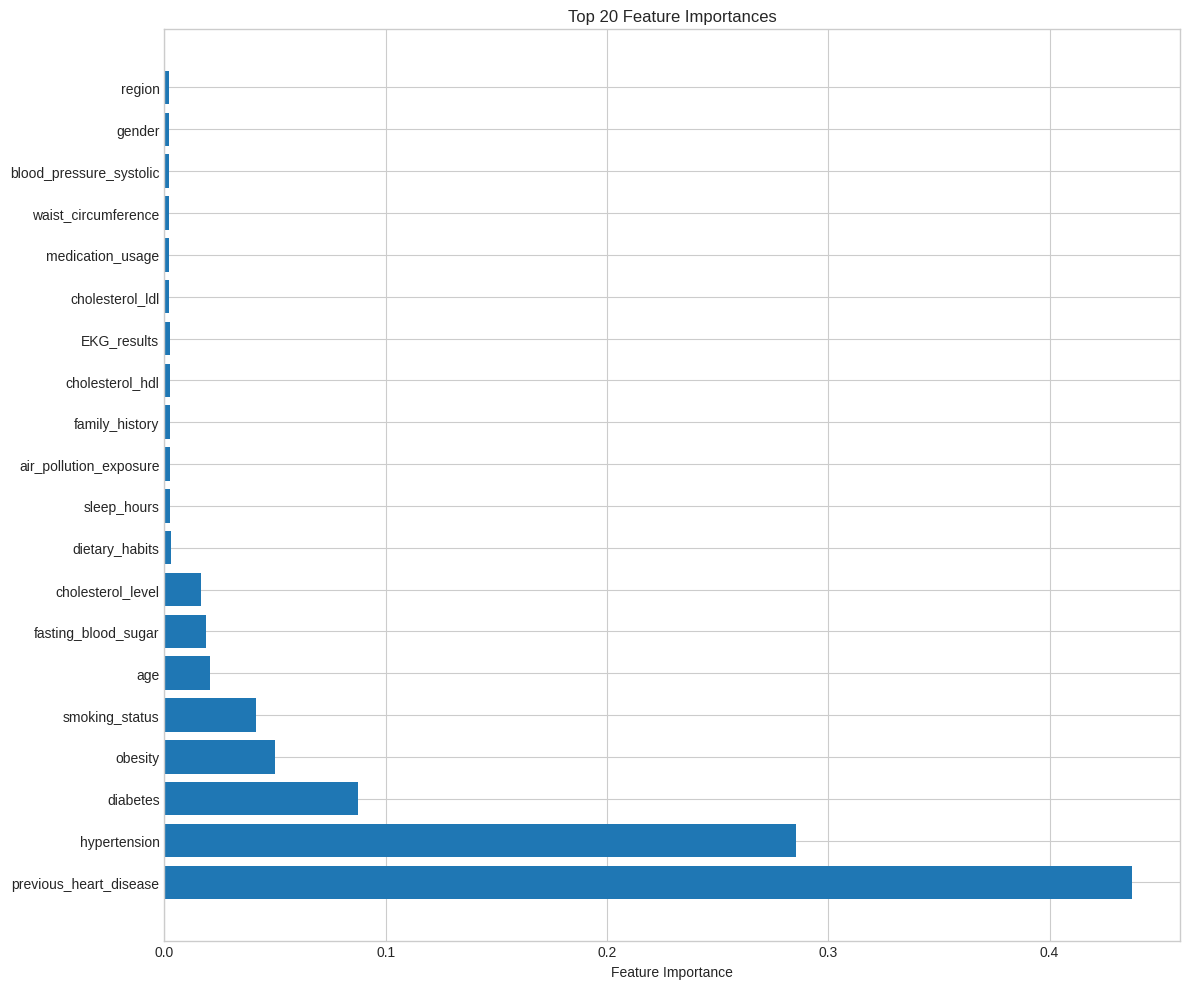

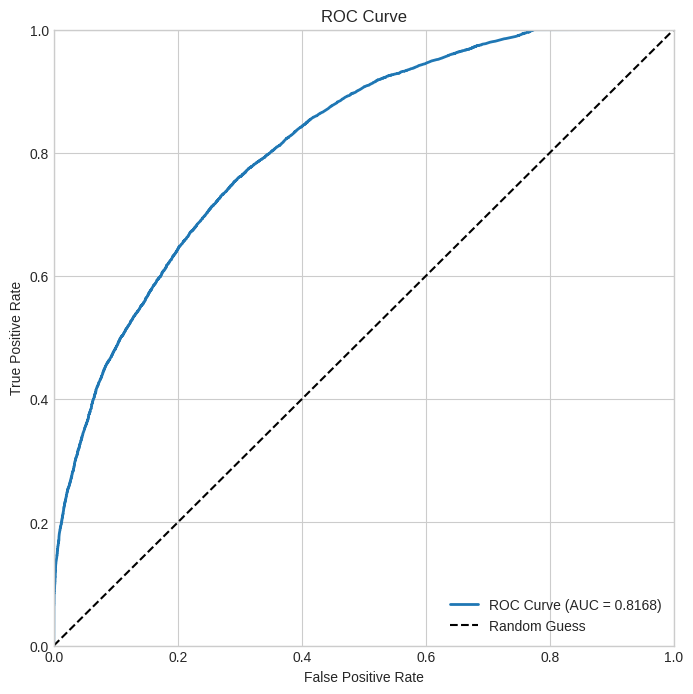

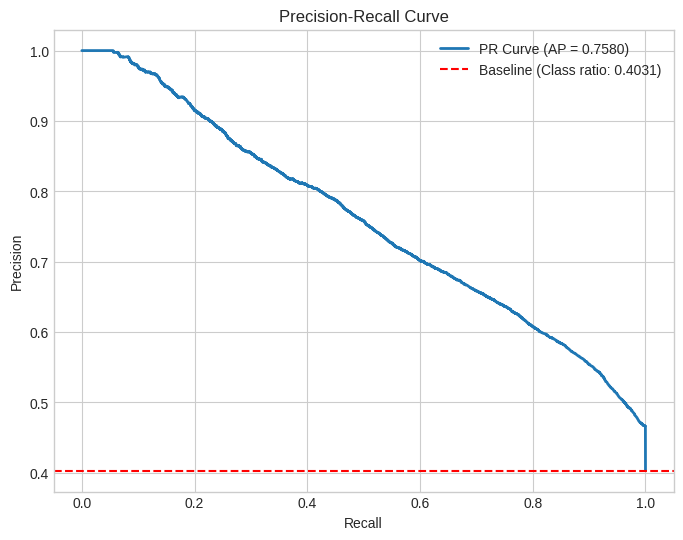

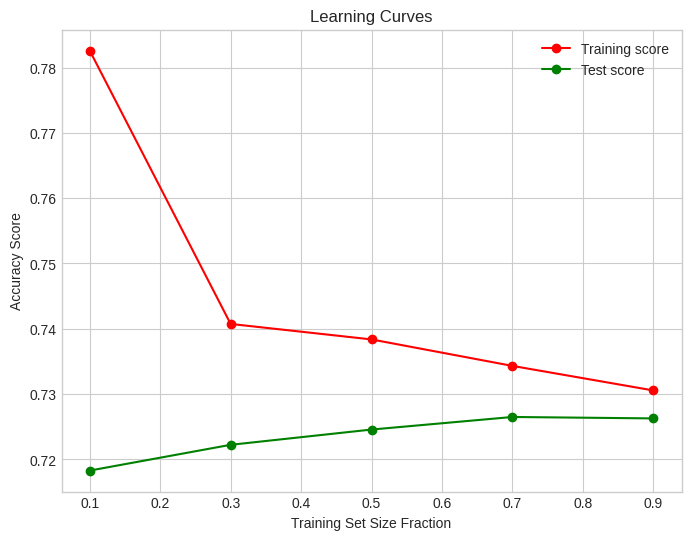

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.utils import resample

from xgboost import XGBClassifier

# Set visual style
colors = ['#011f4b', '#03396c', '#005b96', '#6497b1', '#b3cde0']
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset
print("Loading dataset...")
df = pd.read_csv("heart_attack_prediction_indonesia.csv")

print(f"Original dataset shape: {df.shape}")
print(f"Class distribution: {df['heart_attack'].value_counts()}")

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values[missing_values > 0]}")

# 1. DATA PREPROCESSING
# Handle missing values - convert None to Non-alcoholic instead of dropping
print("\nHandling missing values in alcohol_consumption...")
print(f"Before: {df['alcohol_consumption'].value_counts(dropna=False)}")
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Non-alcoholic')
print(f"After: {df['alcohol_consumption'].value_counts()}")

# Define numeric and categorical columns
numeric_cols = [
    'age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
    'blood_pressure_diastolic', 'sleep_hours', 'fasting_blood_sugar', 
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

nominal_cols = [
    'gender', 'region', 'income_level', 'smoking_status', 
    'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results',
    'hypertension', 'diabetes', 'obesity', 'family_history', 'previous_heart_disease', 
    'medication_usage', 'participated_in_free_screening', 'heart_attack'
]

print(f"Number of Numeric Columns: {len(numeric_cols)}")
print(f"Number of Nominal Columns: {len(nominal_cols)}")

# 2. ENCODING CATEGORICAL VARIABLES
print("\nEncoding categorical variables...")
# Modified label maps to include Non-alcoholic
label_maps = {
    'gender': {'Male': 0, 'Female': 1},
    'region': {'Rural': 0, 'Urban': 1},
    'income_level': {'Low': 0, 'Middle': 1, 'High': 2},
    'smoking_status': {'Never': 0, 'Past': 1, 'Current': 2},
    'alcohol_consumption': {'Non-alcoholic': 0, 'None': 0, 'Moderate': 1, 'High': 2},  # Non-alcoholic = None
    'physical_activity': {'Low': 0, 'Moderate': 1, 'High': 2},
    'dietary_habits': {'Unhealthy': 0, 'Healthy': 1},
    'air_pollution_exposure': {'Low': 0, 'Moderate': 1, 'High': 2},
    'stress_level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'EKG_results': {'Normal': 0, 'Abnormal': 1}
}

for col, mapping in label_maps.items():
    df[col] = df[col].map(mapping)

# 3. CLEAN DATA - handle infinities and NaNs
print("\nCleaning data...")
df_clean = df.copy()
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.dropna(inplace=True)  # Drop rows with NaN values
df = df_clean.copy()
print(f"Dataset shape after cleaning: {df.shape}")

# 4. FEATURE SELECTION AND OUTLIER HANDLING
print("\nHandling outliers and selecting features...")

# Define the features to use first
selected_features = [
    'age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
    'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
    'smoking_status', 'alcohol_consumption', 'physical_activity',
    'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours',
    'blood_pressure_systolic', 'blood_pressure_diastolic',
    'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
    'triglycerides', 'EKG_results', 'previous_heart_disease',
    'medication_usage', 'participated_in_free_screening'
]

# Create X and y BEFORE working with them
X = df[selected_features].copy()
y = df['heart_attack']

# Now work with X for outlier detection
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X.loc[X[col] > 1e10, col] = np.nan

# Detect and handle outliers using z-score method
outlier_info = {}
for col in numeric_cols:
    # Calculate z-scores
    z_scores = zscore(X[col], nan_policy='omit')
    # Flag as outlier if |z| > 3
    outliers = np.abs(z_scores) > 3
    outlier_count = np.sum(outliers)
    outlier_info[col] = outlier_count
    
    # Print outlier information
    if outlier_count > 0:
        print(f"Column {col}: {outlier_count} outliers detected ({outlier_count/len(X)*100:.2f}%)")
    
    # Cap outliers rather than removing rows (preserves data)
    if outlier_count > 0:
        # Get the thresholds (non-outlier min and max)
        non_outliers = X.loc[~outliers, col]
        lower_bound = non_outliers.min()
        upper_bound = non_outliers.max()
        
        # Cap the outliers
        X.loc[z_scores > 3, col] = upper_bound
        X.loc[z_scores < -3, col] = lower_bound

print(f"\nTotal rows: {len(X)}")
print(f"Columns with most outliers:")
for col, count in sorted(outlier_info.items(), key=lambda x: x[1], reverse=True)[:5]:
    if count > 0:
        print(f"  - {col}: {count} outliers")

# Drop any remaining rows with NaN values
X = X.dropna(subset=numeric_cols)
y = y[X.index]

print(f"Final feature matrix shape after outlier handling: {X.shape}")
print(f"Class distribution after outlier handling: {y.value_counts()}")

# 5. DATA PREPROCESSING AND ENCODING
print("\nPreparing data for training...")
# Identify categorical columns that need one-hot encoding (if any are still objects)
cat_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

# Apply preprocessing
X_encoded = preprocessor.fit_transform(X)
print(f"Shape after encoding: {X_encoded.shape}")

# 6. TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# 7. MODEL TRAINING - XGBOOST WITH CLASS WEIGHTS
print("\nTraining XGBoost model using class weights...")

# Calculate class weights from original unbalanced y_train
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

# Initialize XGBoost with class weight
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight  # handle class imbalance
)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model on unbalanced data
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")

# 8. EVALUATION - USING DEFAULT THRESHOLD (0.5)
print("\nEvaluating model with default threshold (0.5)...")

# Calculate predictions on both training and testing sets
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_train_pred = best_model.predict(X_train)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"\nTRAINING METRICS:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Testing metrics
from sklearn.metrics import roc_auc_score, precision_score, recall_score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"\nTEST METRICS:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

# 9. VISUALIZATIONS
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Default Threshold)")
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Feature Importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names and clean up the prefixes
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
    # Clean up feature names by removing the 'remainder__' prefix
    cleaned_feature_names = []
    for name in feature_names:
        if name.startswith('remainder__'):
            cleaned_feature_names.append(name.replace('remainder__', ''))
        else:
            cleaned_feature_names.append(name)
    feature_names = cleaned_feature_names
else:
    feature_names = [f'feature_{i}' for i in range(X_encoded.shape[1])]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance, descending
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print all feature importances
print("\nFeature Importances (All Columns):")
print(feature_importance_df.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 10))
top_n = min(20, len(indices))
plt.barh(range(top_n), importances[indices[:top_n]], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# ROC Curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()

# Additional plot - Precision-Recall tradeoff
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
avg_precision = average_precision_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2, label=f'PR Curve (AP = {avg_precision:.4f})')
plt.axhline(y=sum(y_test)/len(y_test), color='r', linestyle='--', label=f'Baseline (Class ratio: {sum(y_test)/len(y_test):.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('precision_recall_curve.png')
plt.show()

# Learning curves (optional, if you want to check for overfitting)
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_scores = []
test_scores = []

for size in train_sizes:
    # Sample a subset of the training data
    train_indices = np.random.choice(
        np.arange(X_train.shape[0]), 
        size=int(X_train.shape[0] * size), 
        replace=False
    )
    X_train_subset = X_train[train_indices]
    y_train_subset = y_train.iloc[train_indices]
    
    # Train a model with the same parameters
    subset_model = XGBClassifier(
        **best_model.get_params()
    )
    subset_model.fit(X_train_subset, y_train_subset)
    
    # Score on train and test
    train_score = subset_model.score(X_train_subset, y_train_subset)
    test_score = subset_model.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores, 'o-', color='g', label='Test score')
plt.xlabel('Training Set Size Fraction')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curves.png')
plt.show()

### Experiment 2 - Using Downsampling

Loading dataset...
Original dataset shape: (158355, 28)
Class distribution: heart_attack
0    94854
1    63501
Name: count, dtype: int64
Missing values:
alcohol_consumption    94848
dtype: int64

Handling missing values in alcohol_consumption...
Before: alcohol_consumption
NaN         94848
Moderate    47725
High        15782
Name: count, dtype: int64
After: alcohol_consumption
Non-alcoholic    94848
Moderate         47725
High             15782
Name: count, dtype: int64
Number of Numeric Columns: 10
Number of Nominal Columns: 17

Encoding categorical variables...

Cleaning data...
Dataset shape after cleaning: (158355, 28)

Handling outliers and selecting features...
Column cholesterol_level: 200 outliers detected (0.13%)
Column waist_circumference: 426 outliers detected (0.27%)
Column blood_pressure_systolic: 440 outliers detected (0.28%)
Column blood_pressure_diastolic: 421 outliers detected (0.27%)
Column fasting_blood_sugar: 437 outliers detected (0.28%)
Column cholesterol_hdl: 43

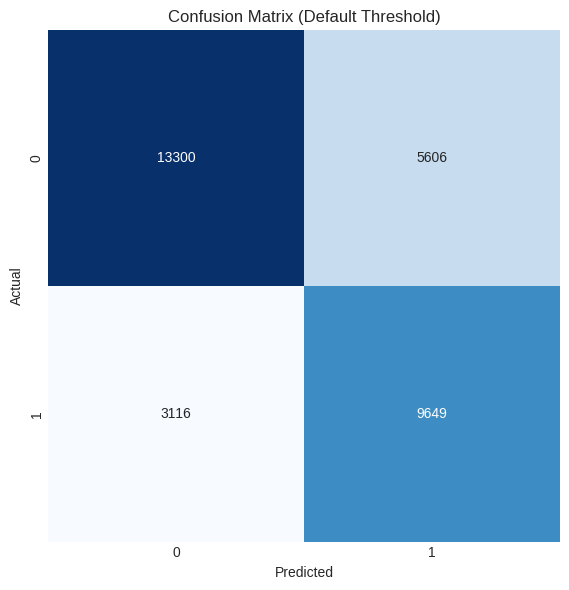


Feature Importances (All Columns):
                       Feature  Importance
        previous_heart_disease    0.384775
                  hypertension    0.267411
                      diabetes    0.093011
                smoking_status    0.075624
                       obesity    0.051732
                           age    0.021233
             cholesterol_level    0.019739
           fasting_blood_sugar    0.016468
           waist_circumference    0.004662
                   EKG_results    0.003871
                dietary_habits    0.003711
                   sleep_hours    0.003709
             physical_activity    0.003696
                        region    0.003667
       blood_pressure_systolic    0.003661
               cholesterol_ldl    0.003658
                 triglycerides    0.003655
      blood_pressure_diastolic    0.003649
               cholesterol_hdl    0.003644
participated_in_free_screening    0.003642
           alcohol_consumption    0.003625
        air_pollut

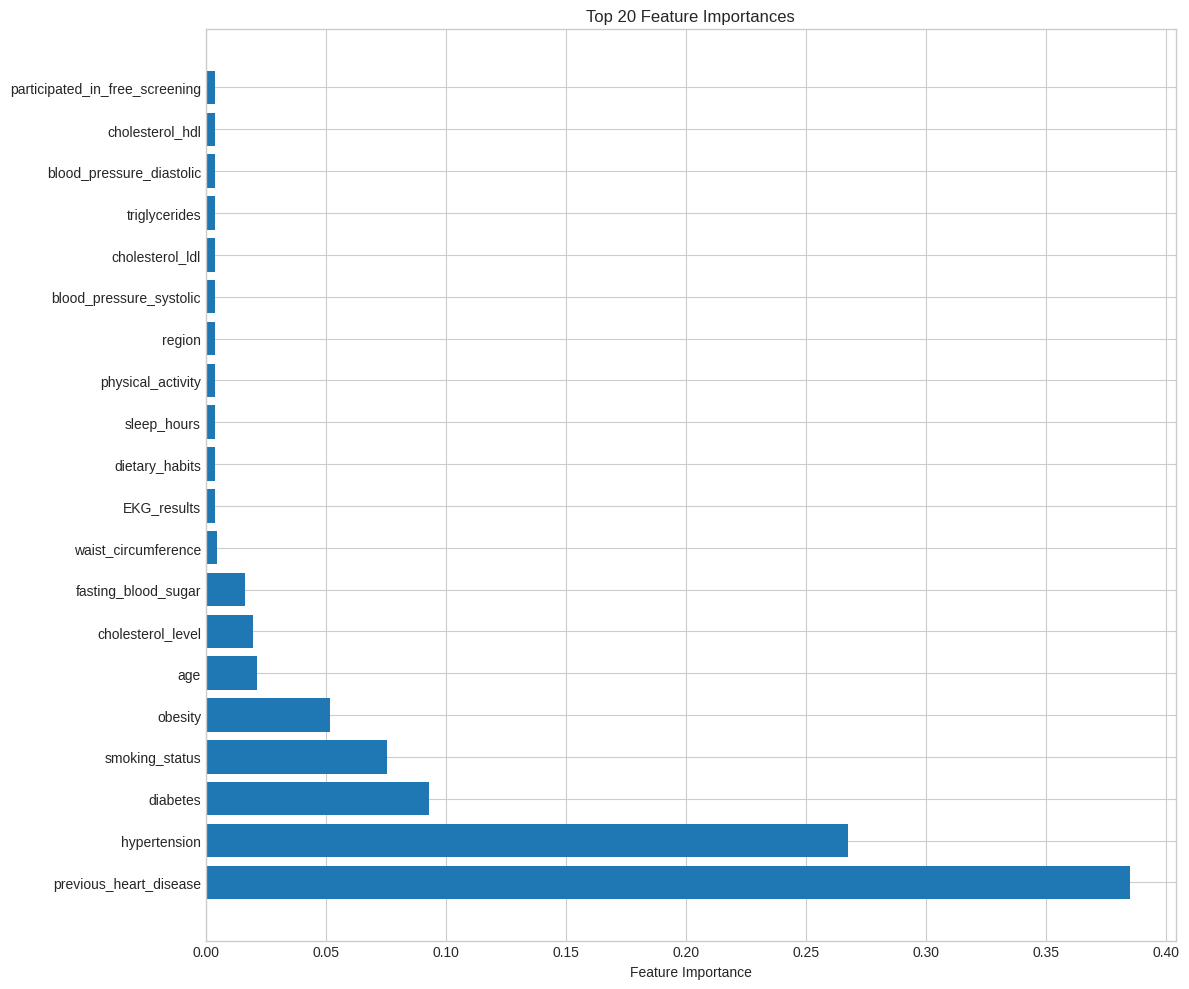

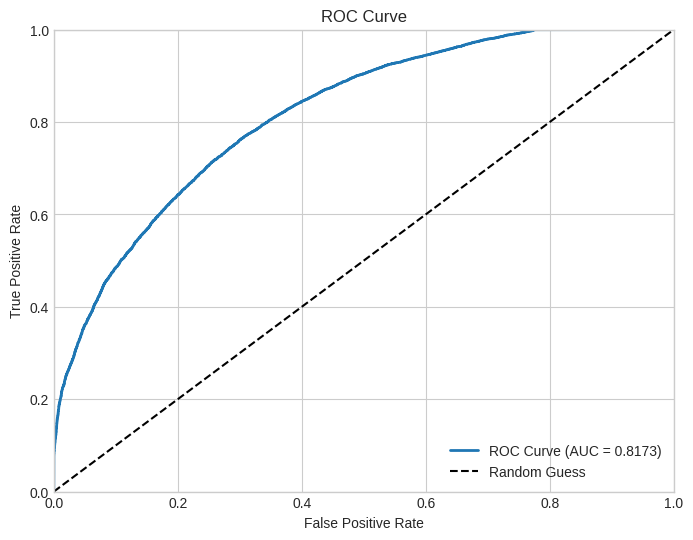

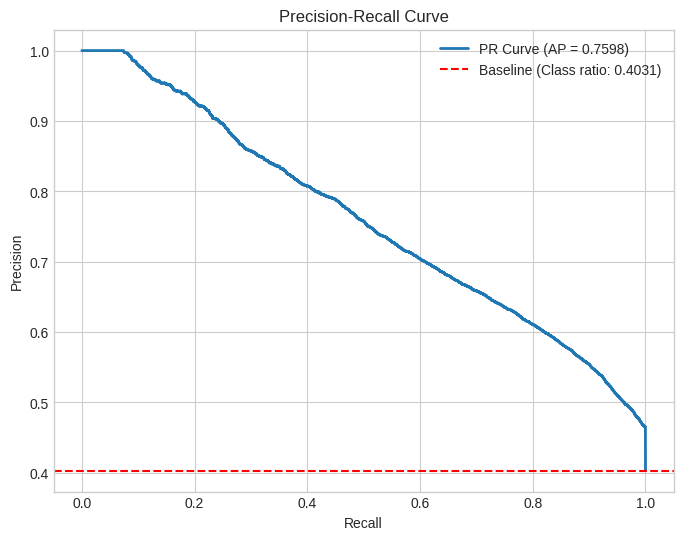

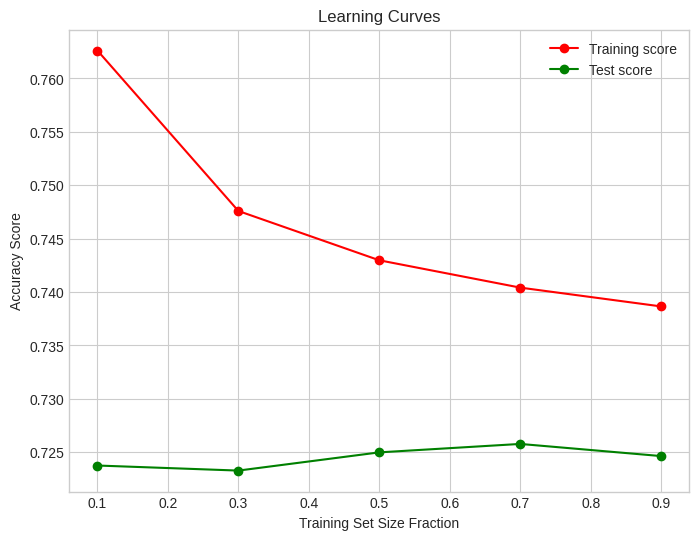

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.utils import resample

from xgboost import XGBClassifier

# Set visual style
colors = ['#011f4b', '#03396c', '#005b96', '#6497b1', '#b3cde0']
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset
print("Loading dataset...")
df = pd.read_csv("heart_attack_prediction_indonesia.csv")

print(f"Original dataset shape: {df.shape}")
print(f"Class distribution: {df['heart_attack'].value_counts()}")

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values[missing_values > 0]}")

# 1. DATA PREPROCESSING
# Handle missing values - convert None to Non-alcoholic instead of dropping
print("\nHandling missing values in alcohol_consumption...")
print(f"Before: {df['alcohol_consumption'].value_counts(dropna=False)}")
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Non-alcoholic')
print(f"After: {df['alcohol_consumption'].value_counts()}")

# Define numeric and categorical columns
numeric_cols = [
    'age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
    'blood_pressure_diastolic', 'sleep_hours', 'fasting_blood_sugar', 
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

nominal_cols = [
    'gender', 'region', 'income_level', 'smoking_status', 
    'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results',
    'hypertension', 'diabetes', 'obesity', 'family_history', 'previous_heart_disease', 
    'medication_usage', 'participated_in_free_screening', 'heart_attack'
]

print(f"Number of Numeric Columns: {len(numeric_cols)}")
print(f"Number of Nominal Columns: {len(nominal_cols)}")

# 2. ENCODING CATEGORICAL VARIABLES
print("\nEncoding categorical variables...")
# Modified label maps to include Non-alcoholic
label_maps = {
    'gender': {'Male': 0, 'Female': 1},
    'region': {'Rural': 0, 'Urban': 1},
    'income_level': {'Low': 0, 'Middle': 1, 'High': 2},
    'smoking_status': {'Never': 0, 'Past': 1, 'Current': 2},
    'alcohol_consumption': {'Non-alcoholic': 0, 'None': 0, 'Moderate': 1, 'High': 2},  # Non-alcoholic = None
    'physical_activity': {'Low': 0, 'Moderate': 1, 'High': 2},
    'dietary_habits': {'Unhealthy': 0, 'Healthy': 1},
    'air_pollution_exposure': {'Low': 0, 'Moderate': 1, 'High': 2},
    'stress_level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'EKG_results': {'Normal': 0, 'Abnormal': 1}
}

for col, mapping in label_maps.items():
    df[col] = df[col].map(mapping)

# 3. CLEAN DATA - handle infinities and NaNs
print("\nCleaning data...")
df_clean = df.copy()
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.dropna(inplace=True)  # Drop rows with NaN values
df = df_clean.copy()
print(f"Dataset shape after cleaning: {df.shape}")

# 4. FEATURE SELECTION AND OUTLIER HANDLING
print("\nHandling outliers and selecting features...")

# Split into X (features) and y (target)
selected_features = [
    'age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
    'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
    'smoking_status', 'alcohol_consumption', 'physical_activity',
    'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours',
    'blood_pressure_systolic', 'blood_pressure_diastolic',
    'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
    'triglycerides', 'EKG_results', 'previous_heart_disease',
    'medication_usage', 'participated_in_free_screening'
]

X = df[selected_features].copy()
y = df['heart_attack']

# First, check for extreme values (data errors)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X.loc[X[col] > 1e10, col] = np.nan

# Detect and handle outliers using z-score method
outlier_info = {}
for col in numeric_cols:
    # Calculate z-scores
    z_scores = zscore(X[col], nan_policy='omit')
    # Flag as outlier if |z| > 3
    outliers = np.abs(z_scores) > 3
    outlier_count = np.sum(outliers)
    outlier_info[col] = outlier_count
    
    # Print outlier information
    if outlier_count > 0:
        print(f"Column {col}: {outlier_count} outliers detected ({outlier_count/len(X)*100:.2f}%)")
    
    # Cap outliers rather than removing rows (preserves data)
    if outlier_count > 0:
        # Get the thresholds (non-outlier min and max)
        non_outliers = X.loc[~outliers, col]
        lower_bound = non_outliers.min()
        upper_bound = non_outliers.max()
        
        # Cap the outliers
        X.loc[z_scores > 3, col] = upper_bound
        X.loc[z_scores < -3, col] = lower_bound

print(f"\nTotal rows: {len(X)}")
print(f"Columns with most outliers:")
for col, count in sorted(outlier_info.items(), key=lambda x: x[1], reverse=True)[:5]:
    if count > 0:
        print(f"  - {col}: {count} outliers")

# Drop any remaining rows with NaN values
X = X.dropna(subset=numeric_cols)
y = y[X.index]

print(f"Final feature matrix shape after outlier handling: {X.shape}")
print(f"Class distribution after outlier handling: {y.value_counts()}")

# 5. DATA PREPROCESSING AND ENCODING
print("\nPreparing data for training...")
# Identify categorical columns that need one-hot encoding (if any are still objects)
cat_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

# Apply preprocessing
X_encoded = preprocessor.fit_transform(X)
print(f"Shape after encoding: {X_encoded.shape}")

# 6. TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# 7. CLASS BALANCING WITH DOWNSAMPLING
print("\nBalancing classes with downsampling...")
# Convert sparse matrix to DataFrame for easier manipulation
X_train_df = pd.DataFrame(X_train)
X_train_df['target'] = y_train.values

# Separate majority and minority classes
majority_class = X_train_df[X_train_df['target'] == 0]
minority_class = X_train_df[X_train_df['target'] == 1]

print(f"Before downsampling - Majority class: {len(majority_class)}, Minority class: {len(minority_class)}")

# Downsample majority class
majority_downsampled = resample(
    majority_class,
    replace=False,  # sample without replacement
    n_samples=len(minority_class),  # match minority class
    random_state=42
)

# Combine minority class with downsampled majority class
X_train_balanced = pd.concat([majority_downsampled, minority_class])

# Shuffle the data
X_train_balanced = X_train_balanced.sample(frac=1, random_state=42)

# Extract features and target
y_train_balanced = X_train_balanced['target']
X_train_balanced = X_train_balanced.drop('target', axis=1).values

print(f"After downsampling - Total samples: {len(X_train_balanced)}")
print(f"Class distribution after downsampling: {pd.Series(y_train_balanced).value_counts()}")

# 8. MODEL TRAINING - XGBOOST WITH HYPERPARAMETER TUNING
print("\nTraining XGBoost model with balanced dataset...")

# Initialize XGBoost without class weight since we balanced the dataset
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model on balanced data
random_search.fit(X_train_balanced, y_train_balanced)
best_model = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")

# 9. EVALUATION - USING DEFAULT THRESHOLD (0.5)
print("\nEvaluating model with default threshold (0.5)...")

# Calculate predictions on both training and testing sets
y_train_proba = best_model.predict_proba(X_train_balanced)[:, 1]
y_train_pred = best_model.predict(X_train_balanced)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

# Training metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_f1 = f1_score(y_train_balanced, y_train_pred)
print(f"\nTRAINING METRICS:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print("Training Classification Report:")
print(classification_report(y_train_balanced, y_train_pred))

# Testing metrics
from sklearn.metrics import roc_auc_score, precision_score, recall_score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"\nTEST METRICS:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

# 10. EVALUATION (CONTINUED) - USING DEFAULT THRESHOLD ONLY
print("\nUsing default threshold (0.5) as in the class weights example...")
# No threshold optimization in this version to match the class weights approach

# 11. VISUALIZATIONS
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Default Threshold)")
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Feature Importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names and clean up the prefixes
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
    # Clean up feature names by removing the 'remainder__' prefix
    cleaned_feature_names = []
    for name in feature_names:
        if name.startswith('remainder__'):
            cleaned_feature_names.append(name.replace('remainder__', ''))
        else:
            cleaned_feature_names.append(name)
    feature_names = cleaned_feature_names
else:
    feature_names = [f'feature_{i}' for i in range(X_encoded.shape[1])]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance, descending
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print all feature importances
print("\nFeature Importances (All Columns):")
print(feature_importance_df.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 10))
top_n = min(20, len(indices))
plt.barh(range(top_n), importances[indices[:top_n]], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# ROC Curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()

# Additional plot - Precision-Recall tradeoff
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
avg_precision = average_precision_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2, label=f'PR Curve (AP = {avg_precision:.4f})')
plt.axhline(y=sum(y_test)/len(y_test), color='r', linestyle='--', label=f'Baseline (Class ratio: {sum(y_test)/len(y_test):.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('precision_recall_curve.png')
plt.show()

# Learning curves (optional, if you want to check for overfitting)
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_scores = []
test_scores = []

for size in train_sizes:
    # Sample a subset of the training data
    train_indices = np.random.choice(
        np.arange(X_train_balanced.shape[0]), 
        size=int(X_train_balanced.shape[0] * size), 
        replace=False
    )
    X_train_subset = X_train_balanced[train_indices]
    y_train_subset = y_train_balanced.iloc[train_indices]
    
    # Train a model with the same parameters
    subset_model = XGBClassifier(
        **best_model.get_params()
    )
    subset_model.fit(X_train_subset, y_train_subset)
    
    # Score on train and test
    train_score = subset_model.score(X_train_subset, y_train_subset)
    test_score = subset_model.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores, 'o-', color='g', label='Test score')
plt.xlabel('Training Set Size Fraction')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curves.png')
plt.show()

### Experiment 3 - Using Upsampling (SMOTE)

Loading dataset...
Original dataset shape: (158355, 28)
Class distribution: heart_attack
0    94854
1    63501
Name: count, dtype: int64
Missing values:
alcohol_consumption    94848
dtype: int64

Handling missing values in alcohol_consumption...
Before: alcohol_consumption
NaN         94848
Moderate    47725
High        15782
Name: count, dtype: int64
After: alcohol_consumption
Non-alcoholic    94848
Moderate         47725
High             15782
Name: count, dtype: int64
Number of Numeric Columns: 10
Number of Nominal Columns: 17

Encoding categorical variables...

Cleaning data...
Dataset shape after cleaning: (158355, 28)

Handling outliers and selecting features...
Column cholesterol_level: 200 outliers detected (0.13%)
Column waist_circumference: 426 outliers detected (0.27%)
Column blood_pressure_systolic: 440 outliers detected (0.28%)
Column blood_pressure_diastolic: 421 outliers detected (0.27%)
Column fasting_blood_sugar: 437 outliers detected (0.28%)
Column cholesterol_hdl: 43

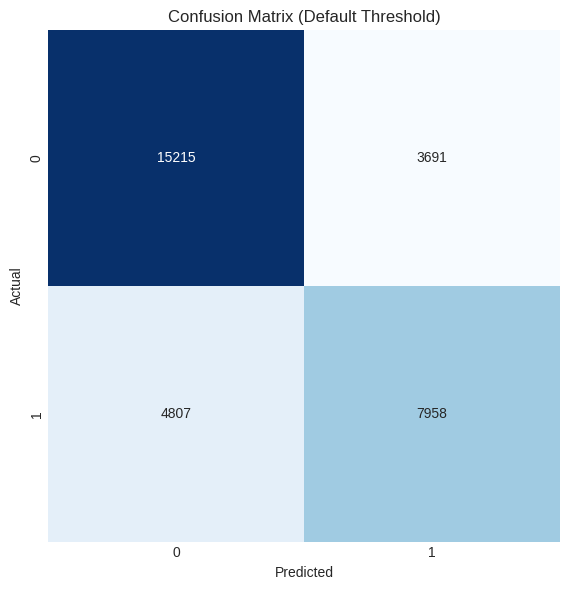


Feature Importances (All Columns):
                       Feature  Importance
                  hypertension    0.252535
        previous_heart_disease    0.247097
                      diabetes    0.123749
                       obesity    0.119759
                smoking_status    0.051657
                dietary_habits    0.018353
              medication_usage    0.015173
participated_in_free_screening    0.014960
                           age    0.014119
                        region    0.013700
             cholesterol_level    0.012186
                   EKG_results    0.012057
                        gender    0.011961
           fasting_blood_sugar    0.009790
                family_history    0.009035
                  income_level    0.008313
           alcohol_consumption    0.007814
        air_pollution_exposure    0.007040
                  stress_level    0.006577
             physical_activity    0.006439
           waist_circumference    0.005507
                  

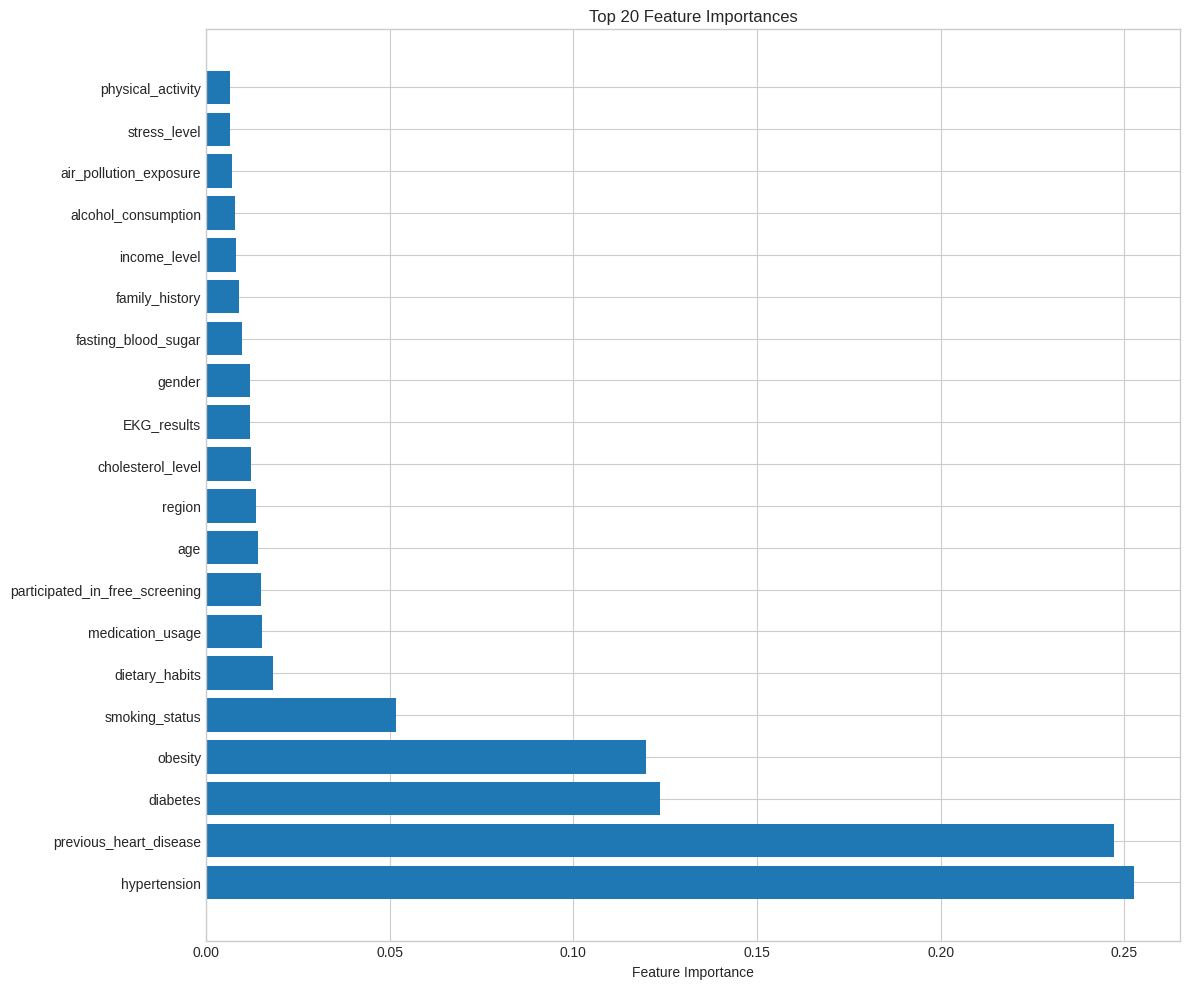

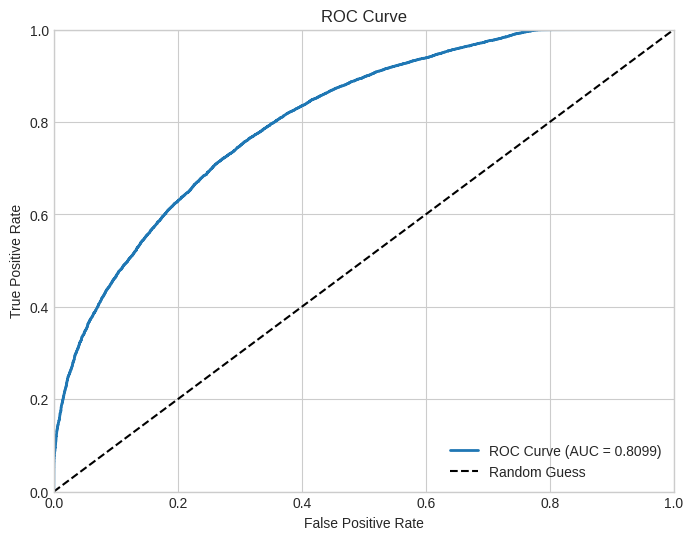

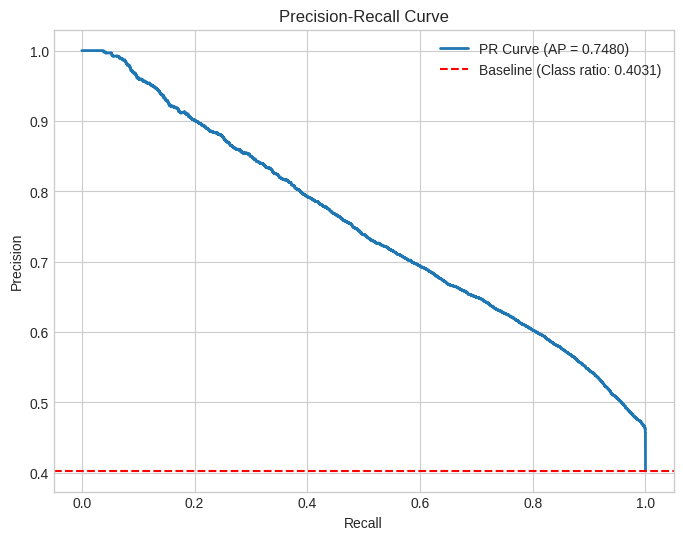

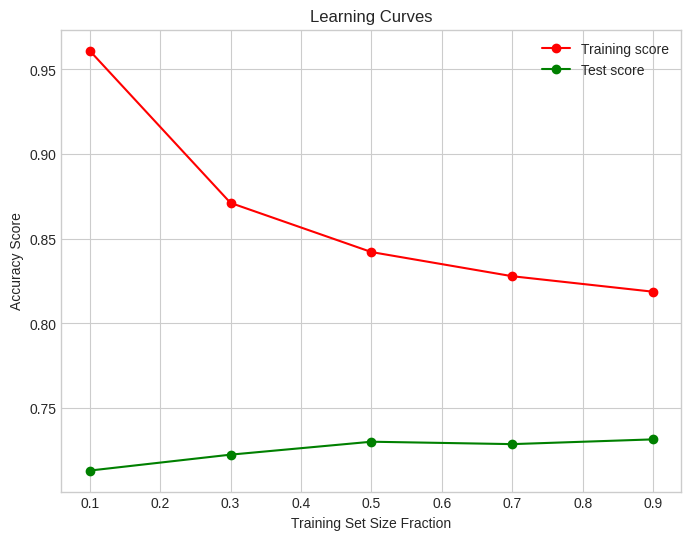

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# Set visual style
colors = ['#011f4b', '#03396c', '#005b96', '#6497b1', '#b3cde0']
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset
print("Loading dataset...")
df = pd.read_csv("heart_attack_prediction_indonesia.csv")

print(f"Original dataset shape: {df.shape}")
print(f"Class distribution: {df['heart_attack'].value_counts()}")

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values[missing_values > 0]}")

# 1. DATA PREPROCESSING
# Handle missing values - convert None to Non-alcoholic instead of dropping
print("\nHandling missing values in alcohol_consumption...")
print(f"Before: {df['alcohol_consumption'].value_counts(dropna=False)}")
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Non-alcoholic')
print(f"After: {df['alcohol_consumption'].value_counts()}")

# Define numeric and categorical columns
numeric_cols = [
    'age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
    'blood_pressure_diastolic', 'sleep_hours', 'fasting_blood_sugar', 
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

nominal_cols = [
    'gender', 'region', 'income_level', 'smoking_status', 
    'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results',
    'hypertension', 'diabetes', 'obesity', 'family_history', 'previous_heart_disease', 
    'medication_usage', 'participated_in_free_screening', 'heart_attack'
]

print(f"Number of Numeric Columns: {len(numeric_cols)}")
print(f"Number of Nominal Columns: {len(nominal_cols)}")

# 2. ENCODING CATEGORICAL VARIABLES
print("\nEncoding categorical variables...")
# Modified label maps to include Non-alcoholic
label_maps = {
    'gender': {'Male': 0, 'Female': 1},
    'region': {'Rural': 0, 'Urban': 1},
    'income_level': {'Low': 0, 'Middle': 1, 'High': 2},
    'smoking_status': {'Never': 0, 'Past': 1, 'Current': 2},
    'alcohol_consumption': {'Non-alcoholic': 0, 'None': 0, 'Moderate': 1, 'High': 2},  # Non-alcoholic = None
    'physical_activity': {'Low': 0, 'Moderate': 1, 'High': 2},
    'dietary_habits': {'Unhealthy': 0, 'Healthy': 1},
    'air_pollution_exposure': {'Low': 0, 'Moderate': 1, 'High': 2},
    'stress_level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'EKG_results': {'Normal': 0, 'Abnormal': 1}
}

for col, mapping in label_maps.items():
    df[col] = df[col].map(mapping)

# 3. CLEAN DATA - handle infinities and NaNs
print("\nCleaning data...")
df_clean = df.copy()
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.dropna(inplace=True)  # Drop rows with NaN values
df = df_clean.copy()
print(f"Dataset shape after cleaning: {df.shape}")

# 4. FEATURE SELECTION AND OUTLIER HANDLING
print("\nHandling outliers and selecting features...")

# Split into X (features) and y (target)
selected_features = [
    'age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
    'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
    'smoking_status', 'alcohol_consumption', 'physical_activity',
    'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours',
    'blood_pressure_systolic', 'blood_pressure_diastolic',
    'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
    'triglycerides', 'EKG_results', 'previous_heart_disease',
    'medication_usage', 'participated_in_free_screening'
]

X = df[selected_features].copy()
y = df['heart_attack']

# First, check for extreme values (data errors)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X.loc[X[col] > 1e10, col] = np.nan

# Detect and handle outliers using z-score method
outlier_info = {}
for col in numeric_cols:
    # Calculate z-scores
    z_scores = zscore(X[col], nan_policy='omit')
    # Flag as outlier if |z| > 3
    outliers = np.abs(z_scores) > 3
    outlier_count = np.sum(outliers)
    outlier_info[col] = outlier_count
    
    # Print outlier information
    if outlier_count > 0:
        print(f"Column {col}: {outlier_count} outliers detected ({outlier_count/len(X)*100:.2f}%)")
    
    # Cap outliers rather than removing rows (preserves data)
    if outlier_count > 0:
        # Get the thresholds (non-outlier min and max)
        non_outliers = X.loc[~outliers, col]
        lower_bound = non_outliers.min()
        upper_bound = non_outliers.max()
        
        # Cap the outliers
        X.loc[z_scores > 3, col] = upper_bound
        X.loc[z_scores < -3, col] = lower_bound

print(f"\nTotal rows: {len(X)}")
print(f"Columns with most outliers:")
for col, count in sorted(outlier_info.items(), key=lambda x: x[1], reverse=True)[:5]:
    if count > 0:
        print(f"  - {col}: {count} outliers")

# Drop any remaining rows with NaN values
X = X.dropna(subset=numeric_cols)
y = y[X.index]

print(f"Final feature matrix shape after outlier handling: {X.shape}")
print(f"Class distribution after outlier handling: {y.value_counts()}")

# 5. DATA PREPROCESSING AND ENCODING
print("\nPreparing data for training...")
# Identify categorical columns that need one-hot encoding (if any are still objects)
cat_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

# Apply preprocessing
X_encoded = preprocessor.fit_transform(X)
print(f"Shape after encoding: {X_encoded.shape}")

# 6. TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# 7. CLASS BALANCING WITH SMOTE
print("\nBalancing classes with SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Shape after SMOTE: {X_train_resampled.shape}")
print(f"Class distribution after SMOTE: {pd.Series(y_train_resampled).value_counts()}")

# 8. MODEL TRAINING - XGBOOST WITH HYPERPARAMETER TUNING
print("\nTraining XGBoost model with balanced dataset...")

# Initialize XGBoost without class weight since we balanced the dataset using SMOTE
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model on balanced data
random_search.fit(X_train_resampled, y_train_resampled)
best_model = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")

# 9. EVALUATION - USING DEFAULT THRESHOLD (0.5)
print("\nEvaluating model with default threshold (0.5)...")

# Calculate predictions on both training and testing sets
y_train_proba = best_model.predict_proba(X_train_resampled)[:, 1]
y_train_pred = best_model.predict(X_train_resampled)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

# Training metrics
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
print(f"\nTRAINING METRICS:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

# Testing metrics
from sklearn.metrics import roc_auc_score, precision_score, recall_score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"\nTEST METRICS:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

# 10. VISUALIZATIONS
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Default Threshold)")
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Feature Importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names and clean up the prefixes
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
    # Clean up feature names by removing the 'remainder__' prefix
    cleaned_feature_names = []
    for name in feature_names:
        if name.startswith('remainder__'):
            cleaned_feature_names.append(name.replace('remainder__', ''))
        else:
            cleaned_feature_names.append(name)
    feature_names = cleaned_feature_names
else:
    feature_names = [f'feature_{i}' for i in range(X_encoded.shape[1])]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance, descending
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print all feature importances
print("\nFeature Importances (All Columns):")
print(feature_importance_df.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 10))
top_n = min(20, len(indices))
plt.barh(range(top_n), importances[indices[:top_n]], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# ROC Curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()

# Additional plot - Precision-Recall tradeoff
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
avg_precision = average_precision_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2, label=f'PR Curve (AP = {avg_precision:.4f})')
plt.axhline(y=sum(y_test)/len(y_test), color='r', linestyle='--', label=f'Baseline (Class ratio: {sum(y_test)/len(y_test):.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('precision_recall_curve.png')
plt.show()

# Learning curves (optional, if you want to check for overfitting)
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_scores = []
test_scores = []

for size in train_sizes:
    # Sample a subset of the training data
    train_indices = np.random.choice(
        np.arange(X_train_resampled.shape[0]), 
        size=int(X_train_resampled.shape[0] * size), 
        replace=False
    )
    X_train_subset = X_train_resampled[train_indices]
    y_train_subset = y_train_resampled[train_indices]
    
    # Train a model with the same parameters
    subset_model = XGBClassifier(
        **best_model.get_params()
    )
    subset_model.fit(X_train_subset, y_train_subset)
    
    # Score on train and test
    train_score = subset_model.score(X_train_subset, y_train_subset)
    test_score = subset_model.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores, 'o-', color='g', label='Test score')
plt.xlabel('Training Set Size Fraction')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curves.png')
plt.show()